# Figure 1 Scatter Plot of Sales and Return

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
themecolor=(0,0,0)
california_eaches=pd.read_csv('california_eaches.csv')
chain_information=pd.read_csv('chain_information.csv')
estimated_margins=pd.read_csv('estimated_margins.csv')
manufacturing_platform=pd.read_csv('manufacturing_platform_capacity.csv')
percent_of_stores=pd.read_csv('percent_of_stores_carrying_by_region.csv')
prices_cleaned=pd.read_csv('prices_cleaned.csv')
ralphsiri=pd.read_csv('RalphsIRI-cleaned.csv')
sales2018=pd.read_csv('sales2018.csv')
sales2018_products=pd.read_csv('sales2018_products.csv')
sales2018_southwest_deepdive=pd.read_csv('sales2018_SOUTHWEST_deepdive.csv')
sales2018_southwest_warehouses=pd.read_csv('sales2018_SOUTHWEST_warehouses.csv')

In [2]:
sales2018_southwest_deepdive=sales2018_southwest_deepdive[sales2018_southwest_deepdive['chain_id'].notna()]

In [3]:
# merge channel_type to sales data , only keep small stores :  
#       'C-STORE','SMALL GROCERY', 'INDEPENDENT BUSINESS','DRUG STORE', 'DOLLAR STORE',
#       'OTHER NON-UDS', 'FOOD SERVICE', 'VEND', 'ALL OTHER'
unique=chain_information.groupby('chain_id',as_index=False).agg({\
                "sales_channel": "first","percentage_by_sales":'max'})
deepdive=pd.merge(sales2018_southwest_deepdive,unique,\
                  on='chain_id',how='left')
deepdive_small = deepdive[deepdive['sales_channel'].isin(['C-STORE','SMALL GROCERY',\
       'INDEPENDENT BUSINESS','DRUG STORE', 'DOLLAR STORE',\
       'OTHER NON-UDS', 'FOOD SERVICE', 'VEND', 'ALL OTHER'])]

In [4]:
# sales data with 999 unique BDCs from sales2018_southwest_deepdive 
sale_percent=deepdive_small.groupby('BDC',as_index=False)\
['sales','returns'].sum()
sum_sales=sum(sale_percent['sales'])
sum_return=sum(sale_percent['returns'])
sale_percent['net_sale']=sale_percent['sales']-sale_percent['returns']
sale_percent['sale_percent']=sale_percent['sales'].apply(lambda x:x/sum_sales)
sale_percent['return_percent']=sale_percent['returns'].apply(lambda x:x/sum_return)
sale_percent['net_sale_percent']=sale_percent['net_sale']\
            .apply(lambda x:x/sum(sale_percent['net_sale']))

In [5]:
# filter out sales that present 250 SKUs bring
now_SKU_code=california_eaches[['product_code']].drop_duplicates()
now_SKU_both=pd.DataFrame(prices_cleaned[prices_cleaned['product_code'].isin(now_SKU_code)]\
                        [['BDC','product_code']].drop_duplicates())
all3=prices_cleaned[['BDC','GTIN','product_code']].drop_duplicates()
join = pd.merge(now_SKU_code, all3, on='product_code',how='left')
join2= pd.merge(now_SKU_code, all3, on='product_code',how='left')
join2['BDC_2'] = np.where(join2['BDC'].isna(), 'other',join2['BDC'])
join2['GTIN_2']= np.where(join2['GTIN'].isna(), 'other',join['GTIN'])
# join2.shape  ==>  (250, 5)
#join.drop(columns=['BDC_2','GTIN_2'],inplace=True)
join2=join2[join2['BDC_2']!='other']
join2.drop(columns=['BDC','GTIN'],inplace=True)
join2.columns=['product_code','BDC','GTIN']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a93a58>]],
      dtype=object)

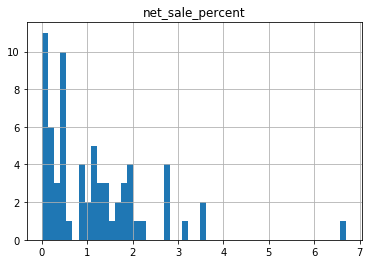

In [6]:
join2['BDC']=join2['BDC'].astype(float)
sale_percent['BDC']=sale_percent['BDC'].astype(float)
join3=pd.merge(join2,sale_percent,on='BDC',how='left')
join3.iloc[:,1:]=preprocessing.scale(join3.iloc[:,1:])
# Plot distribution
temp=join3[join3['net_sale_percent']>0.0001]
temp.hist('net_sale_percent',bins=50)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


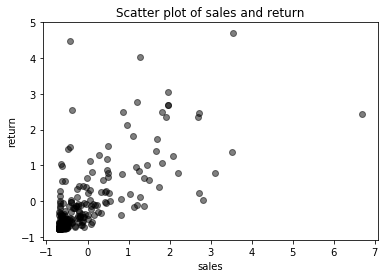

<Figure size 14400x11520 with 0 Axes>

In [7]:
# scatter plot
plt.scatter(join3['sale_percent'], join3['return_percent'], c=themecolor, alpha=0.5)
plt.title('Scatter plot of sales and return')
plt.xlabel('sales')
plt.ylabel('return')
plt.figure(figsize=(200,160))
plt.show()

# Figure 5 Sales Curve

In [8]:
import pandas as pd
import numpy as np
data=pd.read_csv("sales2018.csv")
product=pd.read_csv("sales2018_products.csv")

In [9]:
p= pd.merge(data,product,on='BDC', how='left')
p=p[p["region"]=="SOUTHWEST"]
p["new_cate"]=np.where(p["category_description"]=="OTHER",p["business_unit_description"],p["category_description"])
p["new_cate"]=np.where(p["category_description"]=="SINGLE SERVE",p["business_unit_description"],p["new_cate"])

In [10]:
# combine with the data points selected by BCG matrx 
# !! BCG _selected is a csv file we created based on raw data
selected_BCG=pd.read_csv("BCG_selected.csv")
BCG_list=selected_BCG["BDC"]
p=p[p['BDC'].isin(BCG_list)]

In [11]:
# merge to get chain_id and later filter out large retailers
chain_info=pd.read_csv('chain_information.csv')
p1= pd.merge(p,chain_info,on='chain_id', how='left')
p1["revenue"]=p1["sales"]-p1["returns"]
p1["revenue"]=np.where(p1["revenue"]<0,0,p1["revenue"])
price=pd.read_csv("prices_cleaned.csv")
price.sort_values(by="price_on_bag")

,division,GTIN,UPC,BDC,product_code,description,brand,alt_description,price_area,price_to_store,price_on_bag,ounces,carton_type,count_per_carton,price_per_carton,cube,shelf_life
7646,East,28400047005,4700,98001001,7219001,2CT PNP POLY BA,NaN,NaN,NATL,0.000100,0.0001,270.400,REG,2,0.000200,1.0800,NaN
5134,West,28400042215,4221,98037010,6326601,S2U QUAKER RACK,NaN,NaN,NATL,0.000100,0.0001,96.000,REG,1,0.000100,0.3550,NaN
5133,West,28400037624,3762,98037010,1332101,S2U PRODUCT LOG,NaN,NaN,NATL,0.000100,0.0001,1.000,REG,1,0.000100,1.7100,NaN
5132,West,28400037624,3762,98037010,1332101,S2U PRODUCT LOG,NaN,NaN,HAWAII,0.000100,0.0001,1.000,REG,1,0.000100,1.7100,NaN
5120,West,28400881524,88152,98012006,5630401,SAMPLE LB HON B,NaN,NaN,EOR,0.000100,0.0001,1.000,VFS,104,0.010400,2.6600,NaN
7663,East,28400668798,66879,98037011,4046201,S2U 5CT WIRE RA,NaN,NaN,NATL,0.000100,0.0001,1.000,REG,1,0.000100,1.0000,NaN
7662,East,28400454476,45447,98037011,8076501,S2U 3CT CARDBOA,NaN,NaN,NATL,0.000100,0.0001,1.000,REG,1,0.000100,1.0000,NaN
7661,East,28400092166,9216,98037010,5615701,"S2U 18"" DISPLAY",NaN,NaN,NATL,0.000100,0.0001,96.000,REG,1,0.000100,0.3550,NaN
7660,East,28400042215,4221,98037010,6326601,S2U QUAKER RACK,NaN,NaN,NATL,0.000100,0.0001,96.000,REG,1,0.000100,0.3550,NaN
7659,East,28400037624,3762,98037010,1332101,S2U PRODUCT LOG,NaN,NaN,NATL,0.000100,0.0001,1.000,REG,1,0.000100,1.7100,NaN


In [12]:
# use price data to calculate quantities : (sales - return) / price_on_bag
price1=pd.DataFrame(price.groupby("BDC")["price_on_bag"].mean())
p2= p1.merge(price1,on='BDC', how='left')
p2["price_on_bag"]=np.where(p2["price_on_bag"].isna(),p2["price_on_bag"].mean(),p2["price_on_bag"])
p2["count"]=p2["sales"]/p2["price_on_bag"]

In [13]:
psmall=p2.loc[p1["sales_channel"].isin(['C-STORE','SMALL GROCERY', 'INDEPENDENT BUSINESS',
       'DRUG STORE', 'DOLLAR STORE',
       'OTHER NON-UDS', 'FOOD SERVICE', 'VEND', 'ALL OTHER'])]


In [14]:
# group by BDC so each BDC has a contribution to the total sales
rnew=psmall.groupby("BDC")["revenue"].sum().sort_values(ascending=False)
rnew=pd.DataFrame(rnew)
rnew['cum_sum'] = rnew.revenue.cumsum()
rnew['cum_sum_percent']=rnew["cum_sum"]/(rnew["revenue"].sum())
rnew["product_count"]=range(len(rnew["revenue"]))
rnew["product_count"]=rnew["product_count"]+1
rnew["product_percentage"]=rnew["product_count"]/len(rnew["revenue"])
rnew.reset_index(inplace=True)

In [16]:
rnew.head()

,BDC,revenue,cum_sum,cum_sum_percent,product_count,product_percentage
0,15016033,2.306958e+08,2.306958e+08,0.064857,1,0.001163
1,2016011,1.428460e+08,3.735418e+08,0.105017,2,0.002326
2,15021033,8.472762e+07,4.582694e+08,0.128837,3,0.003488
3,15016008,8.095462e+07,5.392240e+08,0.151596,4,0.004651
4,15016060,7.330806e+07,6.125321e+08,0.172206,5,0.005814


In [15]:
# Output Table And Draw Curve in Excel
rnew.to_csv('rnew.csv',index=False)


#### In the Excel:
Make x axis is product_percentage , y axis is cum_sum_percent (percentage of cumulative sum of sales)

# Figure 6:
This Figure is plotted with EXCEL. The data basiclly is same with what we use in figure 5. For the gross profit for original SKUs, we combine the original 250 SKUs portfolio with the southwest sales data to get the total sales for these SKUs. Then, we also combine the price on bag for these product to calculate the quantity of sale by dividing the total sales with the price on bag. Then we calculate the profit for each product by multiplying the quantity with estimated margins. For the gross profit for optimized SKUs, we directly get the gross profit from the optimization result. 


# Figure 7: 
This Figure is plotted with EXCEL. For the average growth rate for original SKUs and optimized SKUs, we first calculate the growth rate for each period for each product. Then we take the average of the growth rate each period for each product. Then we compute the average growth rate of each product’s mean growth rate.

# Figure 8: 
The table is the binary result from the optimization. The table list all the 250 SKUs selected after the optimization.
